In [8]:
## Initialization and imports
import pandas as pd 
import numpy as np
from math import pi

## Changing directory to top folder (All programs run from top)
import os
os.chdir('/Users/nschumacher/docs/galvanize/smunch-user-food-analysis')

from clustering.cluster_post_prep import *

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'

## Set random seed
np.random.seed(seed=14)

In [9]:
top_ing_f = get_df()
X = top_ing_f.values

## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=3, random_state=0, n_jobs=-1).fit(X)

## Print the top words from each topic
def print_top_ingredients(centroid_data, vocab, n_top_words):
    
    ## Getting sorted indexs of feature importance
    sortedX = np.argsort(centroid_data, axis = 1)
    
    ## Printing top words in each 'topic'
    t = {}
    for i, row in enumerate(sortedX[:, -1:-n_top_words-1:-1]):
        t[str(i)] = [vocab[i] for i in row]
        #print("Topic", i,':', ', '.join([vocab[i] for i in row]))
    
    return pd.DataFrame(t)

ing_import_df = print_top_ingredients(kmeans.cluster_centers_, top_ing_f.columns.values, 89)
ing_import_df['rank'] = np.arange(89)
ing_import_df.head(5)

,0,1,2,rank
0,spicy sauce,veg,butter,0
1,noodles,tofu,egg,1
2,rice,avocado,beef,2
3,sour,falafel,pork,3
4,noodle,grain,mayo,4


In [10]:
## Create Clustered DF
categories = top_ing_f.columns
rows = []
for i in range(3):
    c0_dic = pd.Series(ing_import_df['rank'].values,index=ing_import_df[str(i)]).to_dict()
    rows.append([c0_dic[ing] for ing in categories])

rows = np.vstack(rows)
radar_df = pd.DataFrame(rows, columns=categories)
radar_df['cluster'] = [0,1,2]
radar_df.sample(2)

,savory sauce,spice,meat,veg,sweet sauce,alc,herb,pork,grain,sauce,...,wheat,octopus,falafel,noodle,hummus,paste,df cream,salmon,df cheese,cluster
0,69,88,20,87,66,59,85,52,81,29,...,19,9,76,4,31,14,35,5,33,0
2,72,20,68,80,78,9,15,3,79,66,...,24,63,82,75,46,53,30,64,50,2


/Users/nschumacher/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


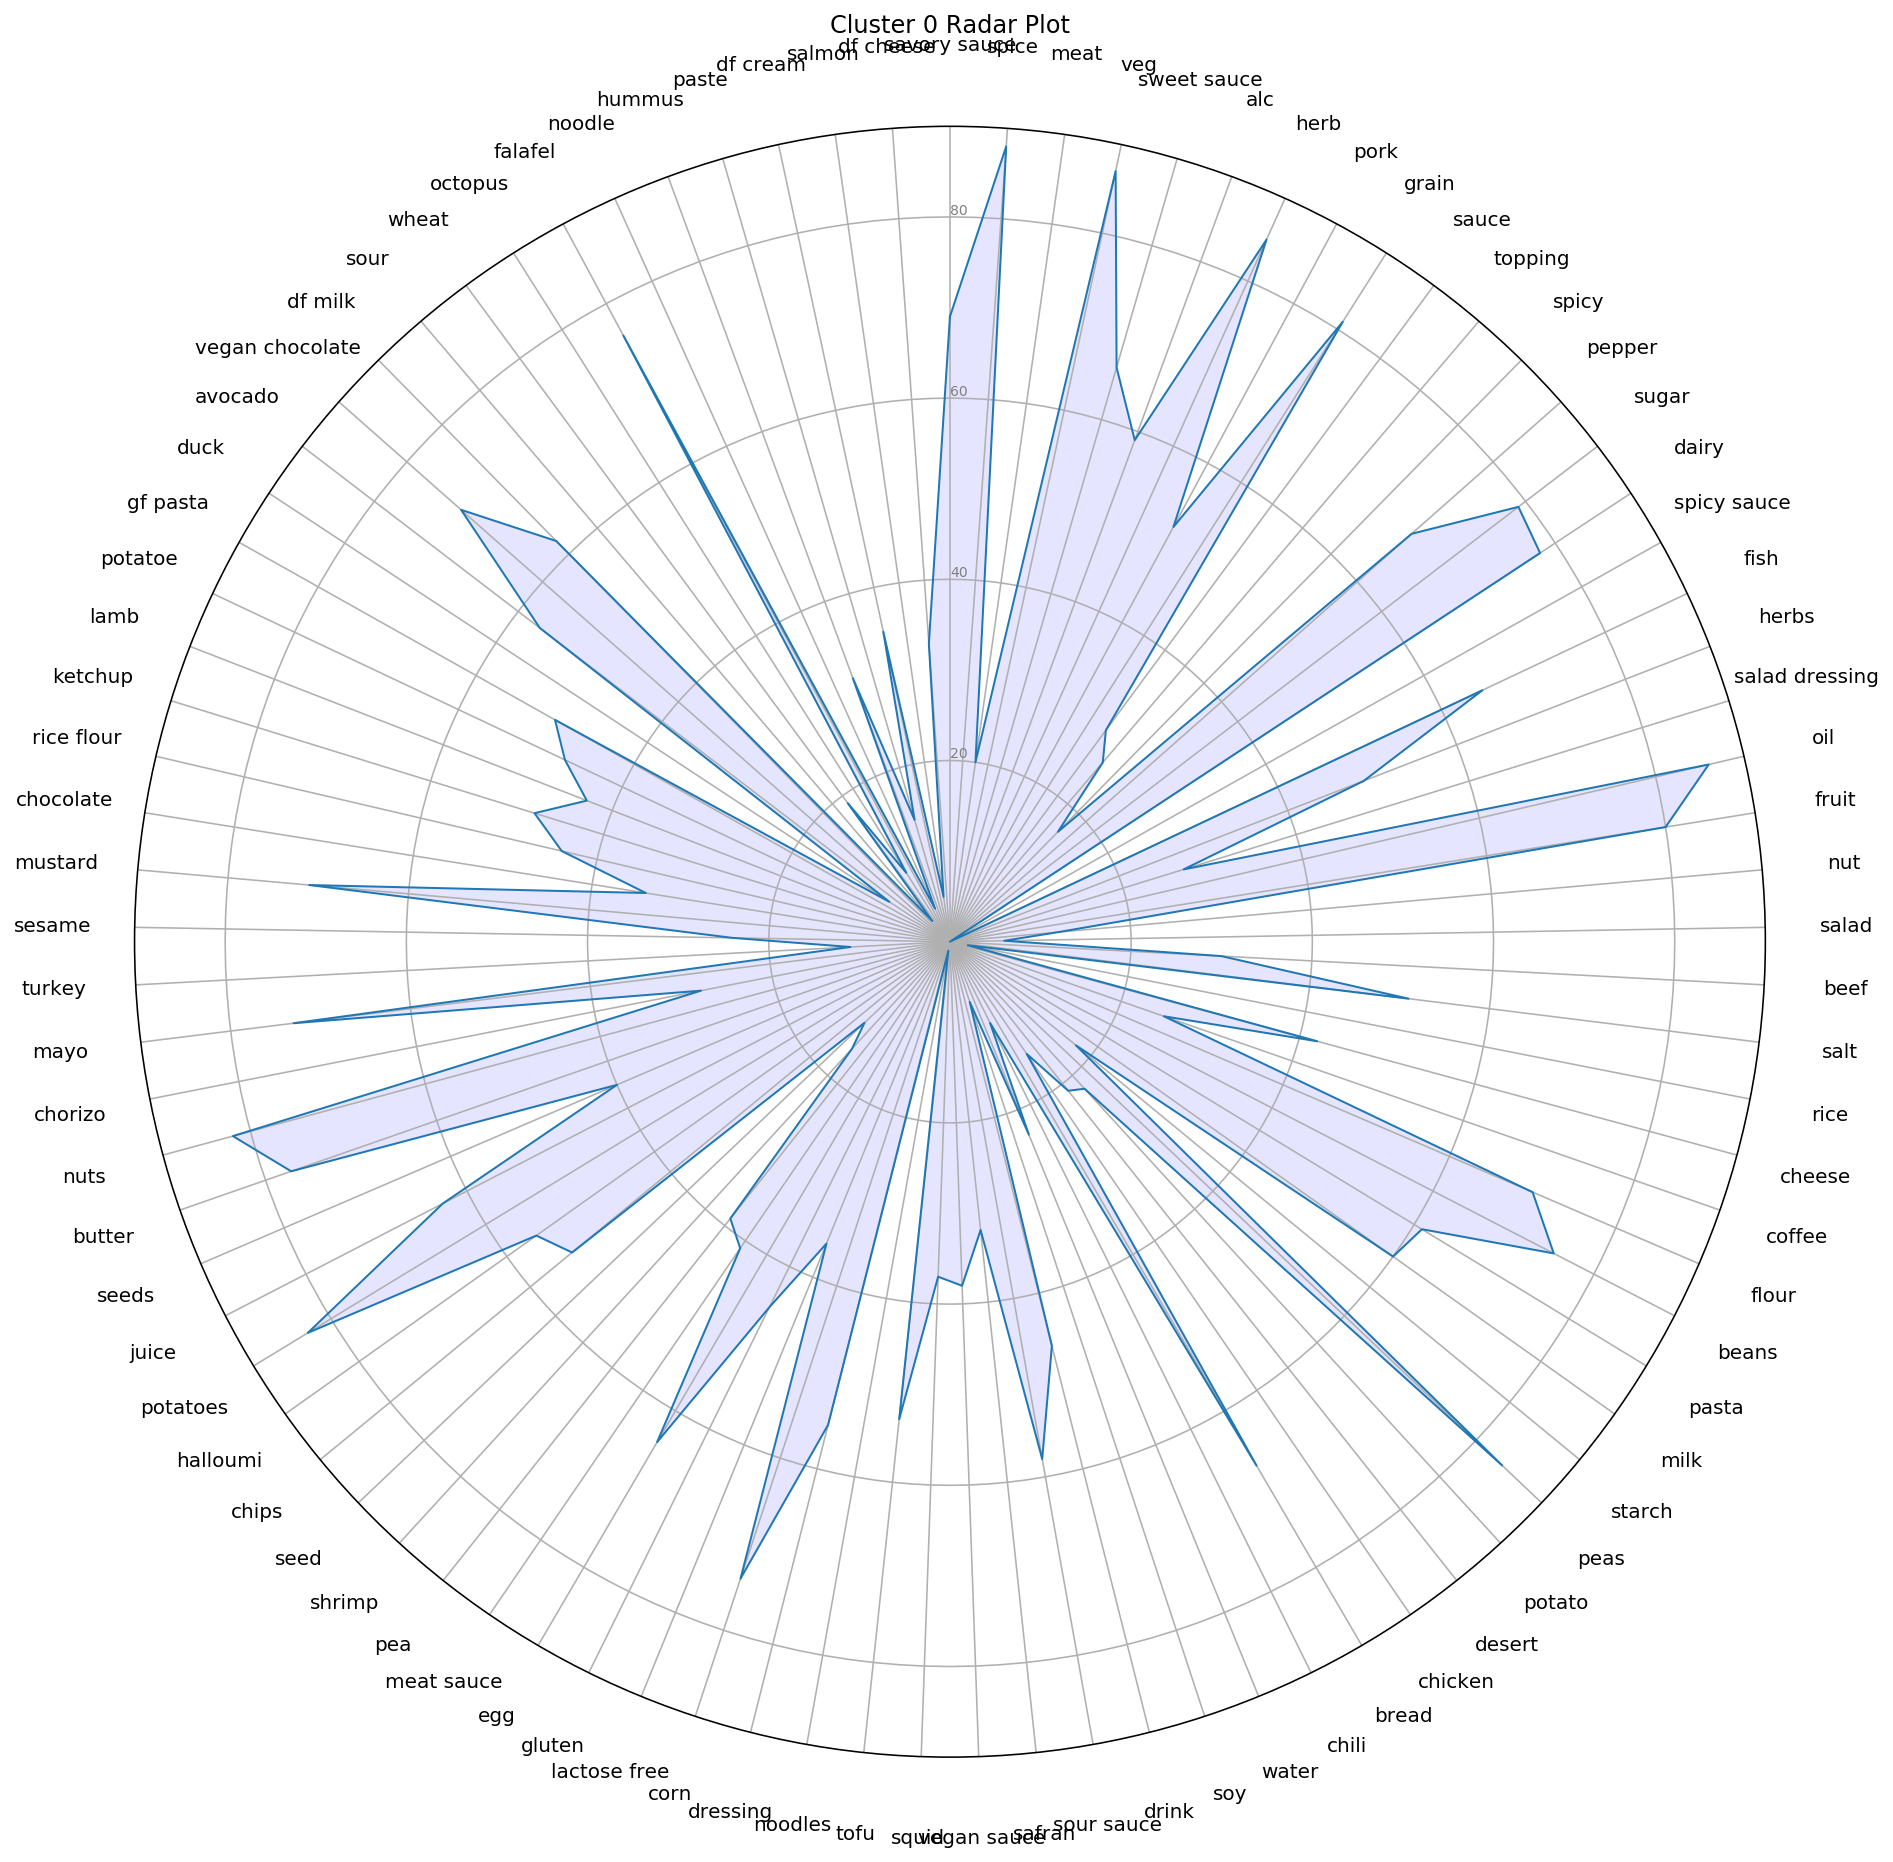

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


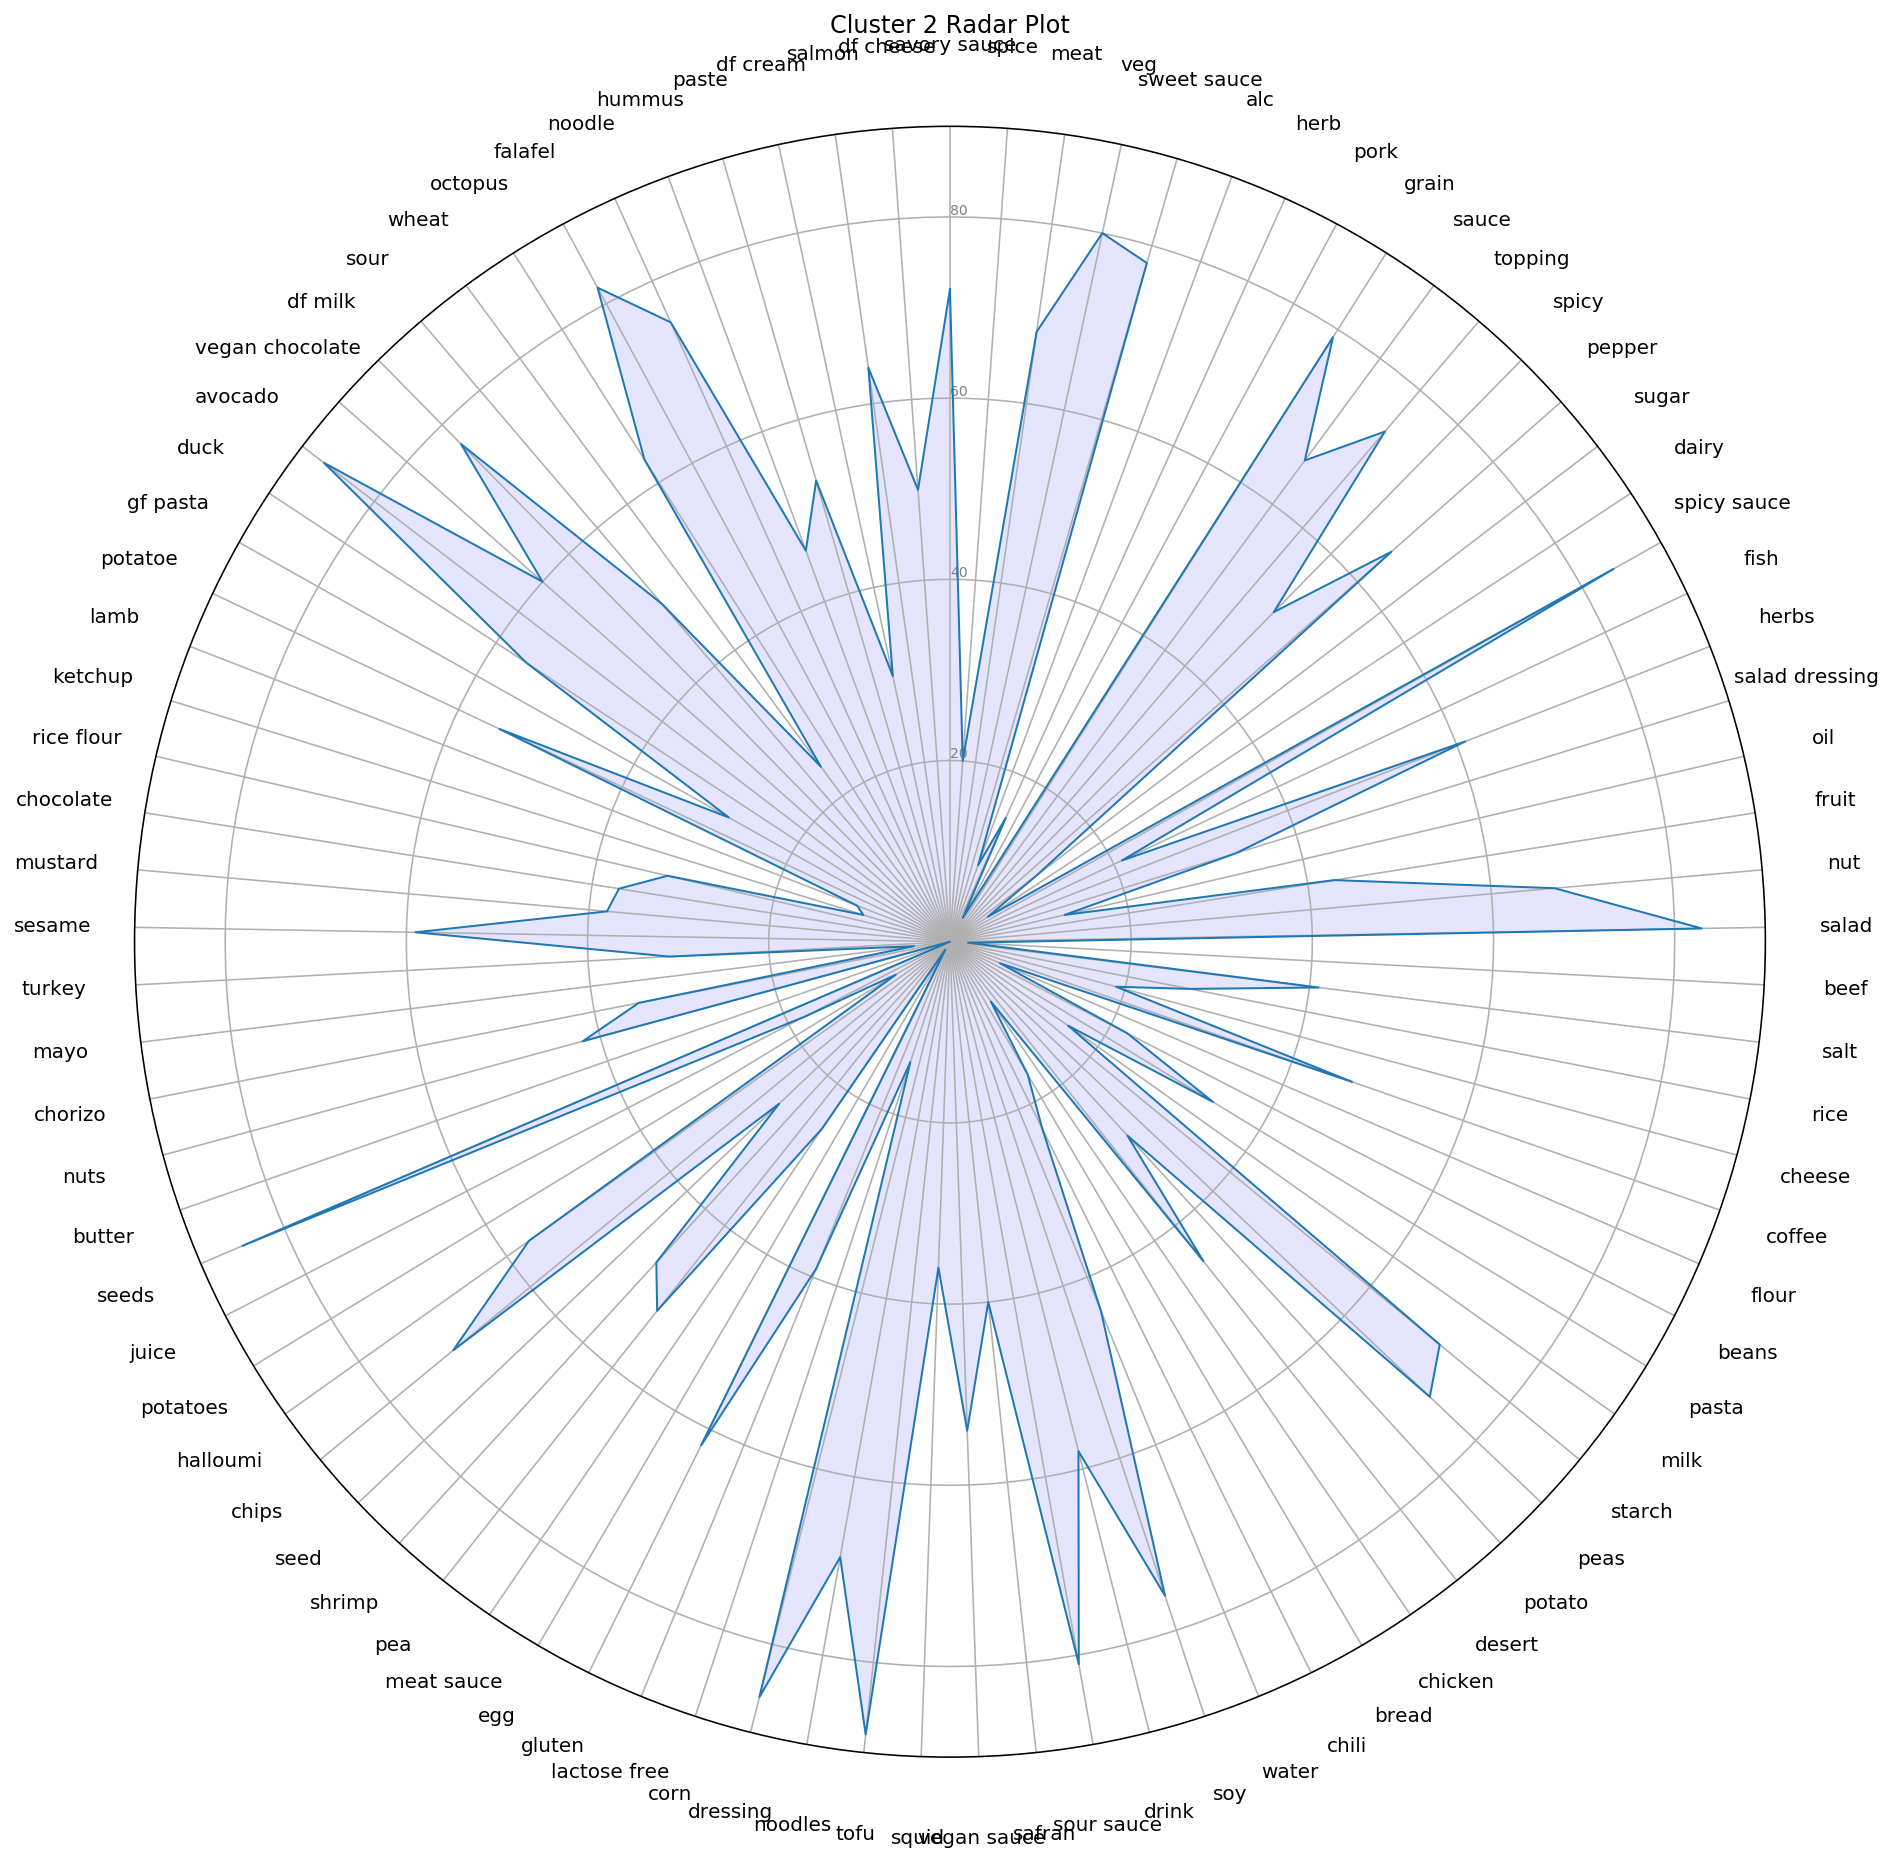

In [12]:
from math import pi
## Creating radar plot

## Number of variables
N = len(categories)

## Angle of each cat
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i in range(3):
    plt.figure(figsize=(15,15))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    ## First axis on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=7)
    plt.ylim(0,90)


    ## Add plots:

    # Ind1
    values=radar_df.loc[i].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    # Add legend
    plt.title("Cluster %d Radar Plot"%i)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()